In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import scipy

In [32]:
from sklearn import metrics, model_selection, preprocessing, ensemble, tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.utils import shuffle

In [4]:
from xgboost import XGBRegressor

In [5]:
import matplotlib.ticker as mtick

In [6]:
Ames = pd.read_csv('AmesFinalDB.csv')
Ames.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
print('Ames shape is : ', str(Ames.shape))

Ames shape is :  (2930, 59)


In [8]:
categorical_features = ['MS_SubClass','MS_Zoning','Lot_Shape','Land_Contour','Lot_Config','Land_Slope']
categorical_features.extend(['Neighborhood','Condition_1','Bldg_Type','House_Style','Roof_Style'])
categorical_features.extend(['Mas_Vnr_Type','Exter_Qual','Exter_Cond','Foundation','Bsmt_Qual','Bsmt_Exposure'])
categorical_features.extend(['basement_type','Heating_QC','Garage_Finish','Mo_Sold','Sale_Type','Sale_Condition','Kitchen_Qual'])
categorical_features.extend(['exterior','Fireplace_Qu','Garage_Type','Garage_Qual'])

Ordinal_featues = ['Overall_Qual','Overall_Cond','Bsmt_Full_Bath','Bsmt_Half_Bath','Bedroom_AbvGr','Full_Bath',
                  'Half_Bath','Kitchen_AbvGr','TotRms_AbvGrd','Fireplaces','Garage_Cars']

Continous_features = ['Lot_Frontage','Lot_Area','age','remodeled_age','Mas_Vnr_Area','basement_area']
Continous_features.extend(['Bsmt_Unf_SF','Total_Bsmt_SF','1st_Flr_SF','2nd_Flr_SF','Low_Qual_Fin_SF'])
Continous_features.extend(['Gr_Liv_Area'])              
Continous_features.extend(['Garage_Area'])
Continous_features.extend(['Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','Screen_Porch','Pool_Area'])
Continous_features.extend(['SalePrice','garage_age'])

In [9]:
Ames = shuffle(Ames)
X = Ames.drop(['SalePrice'],axis=1).copy()
Y = Ames.SalePrice.copy()

In [10]:
AmesFinal = X.drop(categorical_features,axis = 1)
AmesData = AmesFinal.values
AmesCol = AmesFinal.columns

for ifeature in categorical_features:
    
    temp_df = pd.get_dummies(Ames.loc[:,ifeature], prefix = ifeature, prefix_sep = '_')
    AmesCol = list(AmesCol) + list(temp_df.columns)
    temp_data = temp_df.values
    AmesData = np.hstack([AmesData,temp_data])
    
AmesFinal = pd.DataFrame(AmesData, columns = AmesCol)

In [11]:
print('Ames final shape is : ', str(AmesFinal.shape))

Ames final shape is :  (2930, 254)


In [12]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(AmesFinal)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(AmesFinal,Y,test_size = 0.33)

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
xgboost = XGBRegressor()

In [46]:
xgboost.fit(X_train,Y_train)

R2_train = np.round(xgboost.score(X_train,Y_train),3)
R2_test  = np.round(xgboost.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :0.998
Testing  score is :0.908


In [47]:
xgboost = XGBRegressor()
xgboost.max_depth = 25
xgboost.grow_policy = 'lossguide'
#xgboost.gamma = 10
#xgboost.max_leaves = 10
#xgboost.learning_rate = 0.15
#xgboost.booster = 'dart'
xgboost.n_estimators = 100
xgboost.reg_alpha = 200
xgboost.reg_lambda = 20

xgboost.fit(X_train,Y_train)

R2_train = np.round(xgboost.score(X_train,Y_train),3)
R2_test  = np.round(xgboost.score(X_test,Y_test),3)

print('Training score is :'+ str(R2_train))
print('Testing  score is :'+ str(R2_test))

Training score is :1.0
Testing  score is :0.892


In [48]:
from plot_function import plot_randomforest

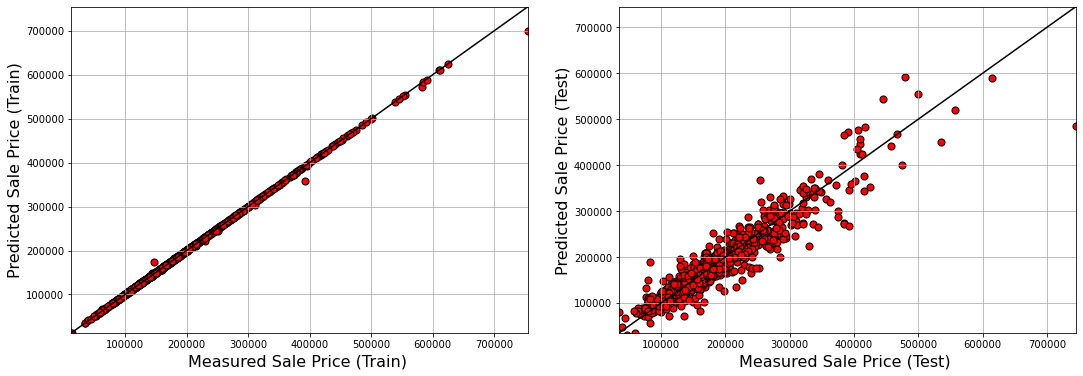

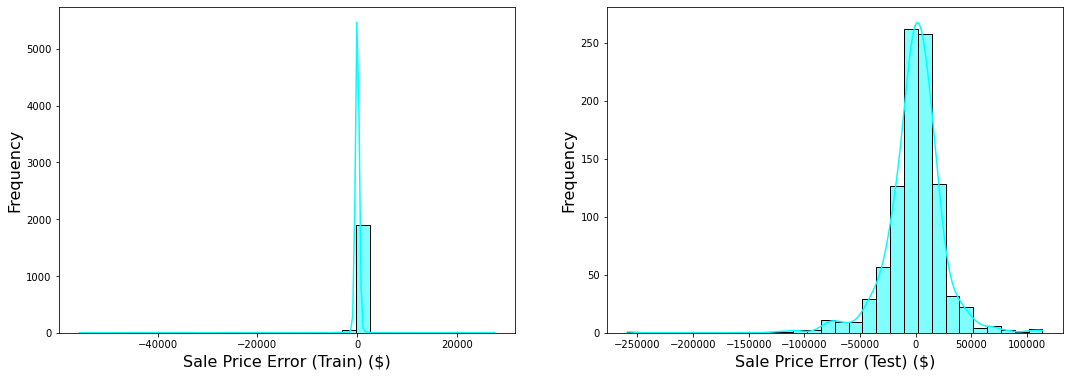

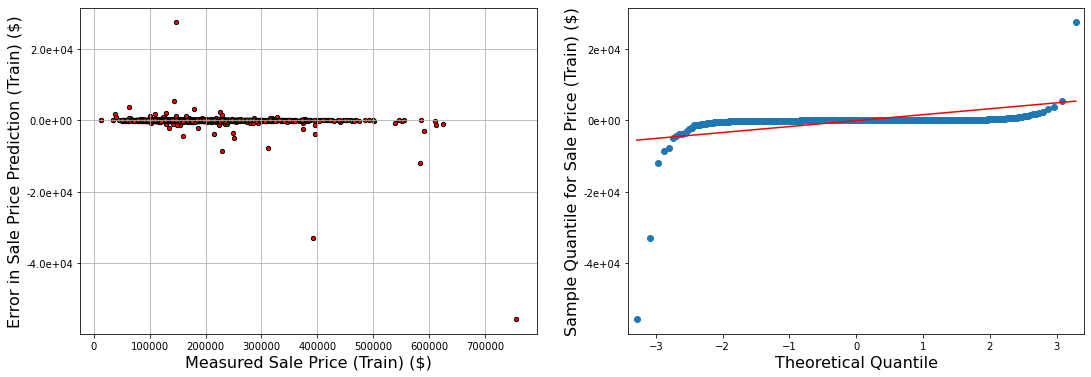

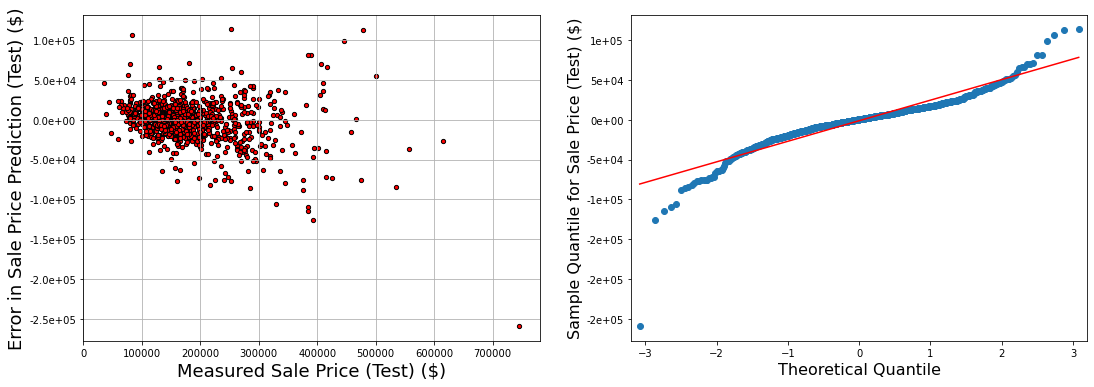

In [49]:
plot_randomforest(xgboost,X_train,X_test,Y_train,Y_test)

In [35]:
train_score_cv = cross_val_score(xgboost, X_train, Y_train, cv = 5)
test_score_cv  = cross_val_score(xgboost, X_test,  Y_test , cv = 5)

In [36]:
train_score_cv

array([0.87736192, 0.87938529, 0.86000394, 0.88619721, 0.84887808])

In [37]:
test_score_cv

array([0.85051822, 0.81907784, 0.91217078, 0.85672327, 0.8822741 ])

In [38]:
np.mean(train)

0.8911291348635031

In [39]:
np.mean(test)

0.8953388250809644

In [ ]:
y_train_pred = xgboost.predict(X_train)
y_test_pred  = xgboost.predict(X_test)

fig, axis = plt.subplots(1,2,figsize=(18,6))

axis[0].scatter(x=Y_train,y=y_train_pred, color='red',edgecolors='blue',marker = 'o',s=40,label='Train')
axis[1].scatter(x=Y_test,y=y_test_pred, color='orange',edgecolors='black',marker ='*',s=40,label='Test')

axis[0].plot([0,max(Y_train)],[0,max(Y_train)],color='black')
axis[1].plot([0,max(Y_test)],[0,max(Y_test)],color='black')

axis[0].set_xlim([min(Y_train),max(Y_train)])
axis[0].set_ylim([min(Y_train),max(Y_train)])

axis[1].set_xlim([min(Y_test),max(Y_test)])
axis[1].set_ylim([min(Y_test),max(Y_test)])

axis[0].set_xlabel('Observed  Price for Training sample ($)',fontsize=14)
axis[0].set_ylabel('Predicted Price for Training sample ($)',fontsize=14)
axis[1].set_xlabel('Observed  Price for Testing sample ($)',fontsize=14)
axis[1].set_ylabel('Predicted Price for Testing sample ($)',fontsize=14)

axis[0].ticklabel_format(axis='both',style='sci',scilimits=[0,3])
axis[1].ticklabel_format(axis='both',style='sci',scilimits=[0,3])

axis[0].legend()
axis[1].legend()
plt.show()

y_train_pred = xgboost.predict(X_train)
y_test_pred  = xgboost.predict(X_test)
y_train_err  = y_train_pred - Y_train.values
y_test_err  = y_test_pred - Y_test.values

fig, axis = plt.subplots(1,2,figsize=(18,6))

axis[0].scatter(x=Y_train.values,y=y_train_err, color = 'red', edgecolors='black', s = 18)
axis[0].set_xlabel('Measured Sale Price (Train) ($)', fontsize = 16)
axis[0].set_ylabel('Error in Sale Price Prediction (Train) ($)', fontsize = 16)
axis[0].grid()

axis[1].scatter(x=Y_test.values,y=y_test_err, color = 'red', edgecolors='black', s = 18)
axis[1].set_xlabel('Measured Sale Price (Test) ($)', fontsize = 16)
axis[1].set_ylabel('Error in Sale Price Prediction (Test) ($)', fontsize = 16)
axis[1].grid()

axis[0].ticklabel_format(axis='both',style='sci',scilimits=[0,3])
axis[1].ticklabel_format(axis='both',style='sci',scilimits=[0,3]);

In [ ]:
plt.scatter(x=Y_train.values,y=y_train_err)

In [ ]:
y_train_err